In [36]:
# 1. Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
# Chargement des données
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 
           'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df = pd.read_csv(url, names=columns)

# Vérifions que tout est bien chargé
print("Aperçu des données :")
display(df.head())
print("\nTaille du dataset :", df.shape)

Aperçu des données :


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0



Taille du dataset : (303, 14)


In [38]:
# Préparation des données
X = df[['age', 'cp', 'thalach']]
y = df['target']

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Taille train :", X_train.shape)
print("Taille test :", X_test.shape)

Taille train : (242, 3)
Taille test : (61, 3)


In [39]:
# 4. Création et test des modèles
# Modèle 1 : Simple
rf1 = RandomForestClassifier(n_estimators=50, max_depth=3, random_state=42)
rf1.fit(X_train, y_train)
score1_train = rf1.score(X_train, y_train)
score1_test = rf1.score(X_test, y_test)

# Modèle 2 : Moyen
rf2 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf2.fit(X_train, y_train)
score2_train = rf2.score(X_train, y_train)
score2_test = rf2.score(X_test, y_test)

# Modèle 3 : Complexe
rf3 = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf3.fit(X_train, y_train)
score3_train = rf3.score(X_train, y_train)
score3_test = rf3.score(X_test, y_test)

# Affichage des scores
print("\nRésultats des modèles :")
print("\nModèle Simple :")
print(f"Train : {score1_train:.3f} | Test : {score1_test:.3f}")

print("\nModèle Moyen :")
print(f"Train : {score2_train:.3f} | Test : {score2_test:.3f}")

print("\nModèle Complexe :")
print(f"Train : {score3_train:.3f} | Test : {score3_test:.3f}")


Résultats des modèles :

Modèle Simple :
Train : 0.624 | Test : 0.541

Modèle Moyen :
Train : 0.744 | Test : 0.492

Modèle Complexe :
Train : 0.996 | Test : 0.475


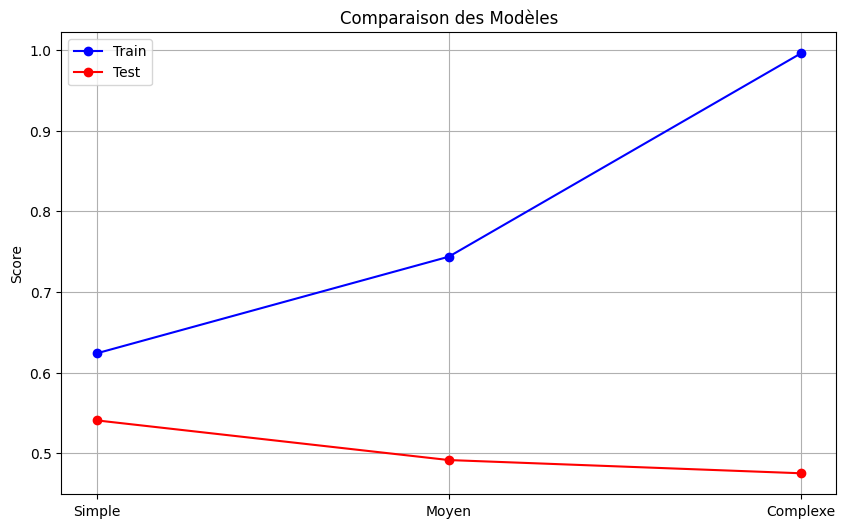

In [40]:
# 5. Visualisation des résultats
plt.figure(figsize=(10, 6))
modeles = ['Simple', 'Moyen', 'Complexe']
scores_train = [score1_train, score2_train, score3_train]
scores_test = [score1_test, score2_test, score3_test]

plt.plot(modeles, scores_train, 'o-', label='Train', color='blue')
plt.plot(modeles, scores_test, 'o-', label='Test', color='red')
plt.title('Comparaison des Modèles')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

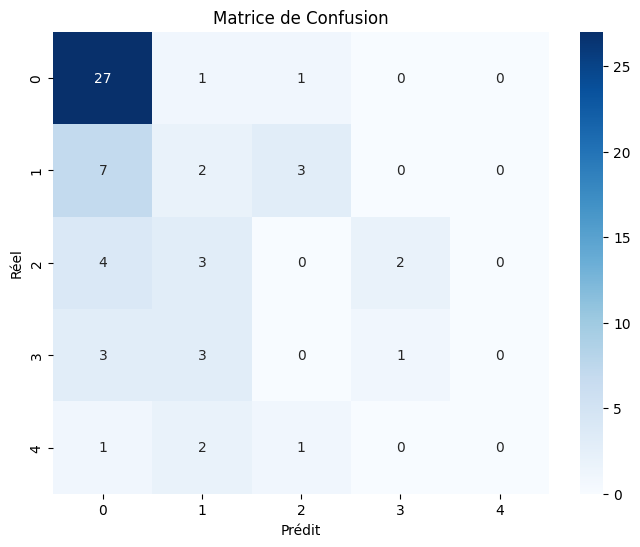


--- Résultats du modèle ---

📊 Détails par classe :
              precision    recall  f1-score   support

           0       0.64      0.93      0.76        29
           1       0.18      0.17      0.17        12
           2       0.00      0.00      0.00         9
           3       0.33      0.14      0.20         7
           4       0.00      0.00      0.00         4

    accuracy                           0.49        61
   macro avg       0.23      0.25      0.23        61
weighted avg       0.38      0.49      0.42        61



C:\Users\Tarik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Tarik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Tarik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificati

In [41]:
# Imports
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# On fait les prédictions avec notre meilleur modèle
y_pred = rf2.predict(X_test)

# 1. Matrice de confusion
plt.figure(figsize=(8, 6))
confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de Confusion')
plt.ylabel('Réel')
plt.xlabel('Prédit')
plt.show()

print("\n--- Résultats du modèle ---")

# 3. Rapport simplifié
print("\n📊 Détails par classe :")
rapport = classification_report(y_test, y_pred)
print(rapport)

# Analyse des Résultats du Modèle

## Score Global
- Accuracy = 0.49 (49%)
- Signification : Le modèle a raison dans 49% des cas
- C'est assez faible (on préfère > 70%)

## Analyse par Classe (0 à 4)

### Classe 0 (Pas de maladie)
- Precision : 0.64 (64% des prédictions "classe 0" sont correctes)
- Recall : 0.93 (93% des vrais "classe 0" sont trouvés)
- Support : 29 patients
- Meilleurs résultats sur cette classe

### Classe 1
- Precision : 0.18 (18% des prédictions sont correctes)
- Recall : 0.17 (17% des vrais cas sont trouvés)
- Support : 12 patients
- Résultats faibles

### Classes 2, 3, 4
- Precision et Recall proches de 0
- Support : 9, 7 et 4 patients
- Le modèle échoue sur ces classes

